In [1]:
# define relevants paths and load functions and libraries

%run Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Analysis\\helper_functions\\functions_analysis.py

data_path = 'paper_code\\Datasets\\' # your data path
saving_path = 'paper_code\\Figures_output\\' # your saving figures path


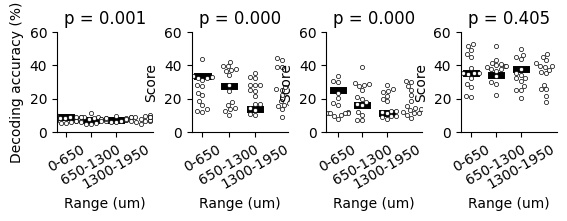

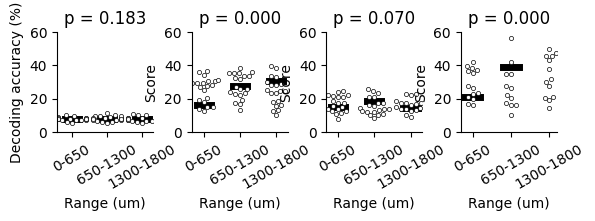

In [4]:
#%% Now we are looking at how performance varies across different anatomical axes

axes = ['ML', 'AP']
classes = ['visual', 'auditory', 'multi no delay', 'delay']
which_mod = [1, 2, 3, 4]

for type_axis in axes:
    fig, axs = plt.subplots(1, 4, figsize=(5, 1))
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0.4)

    for l, mod in enumerate(which_mod):
        this_ax = axs[l]

        # Load accuracy scores and locations
        load_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_mod{mod}.npy'])
        scores = np.load(load_dir)
        load_dir = ''.join([data_path,f'decoder_datasets\\decoder_accuracy_{type_axis}_locations_mod{mod}.npy'])
        locs = np.load(load_dir)

        # Set labels
        this_ax.set_ylabel('Decoding accuracy (%)' if l == 0 else '', fontsize=10)
        this_ax.set_xlabel('Range (um)')

        # Prepare data for beeswarm plot
        df = pd.DataFrame({'Location': np.repeat(range(scores.shape[1]), scores.shape[0]),
                           'Score': scores.flatten()})

        # Plot beeswarm
        sns.swarmplot(x='Location', y='Score', data=df, ax=this_ax, size=3, facecolors='white', 
                      edgecolor='k', linewidth=0.5, zorder=2)

        # Plot median lines
        for loc in range(scores.shape[1]):
            med = np.median(scores[:, loc])
            this_ax.plot([loc - 0.2, loc + 0.2], [med, med], linewidth=5, c='k', zorder=1)

        sns.despine(top=True, right=True)

        # Format x-axis labels
        x_tick_labels = [f"{locs[0][i]:.0f}-{locs[1][i]:.0f}" for i in range(len(locs[0]))]
        xticks_range = np.arange(len(x_tick_labels) - 1) if type_axis == 'ML' else np.arange(len(x_tick_labels))
        this_ax.set_xticks(xticks_range, x_tick_labels[:-1] if type_axis == 'ML' else x_tick_labels, rotation=30)

        this_ax.set_ylim([0, 60])

        # Perform Kruskal-Wallis test
        stat, all_p = kruskal_test(*scores.T)
        this_ax.set_title(f"p = {all_p:.3f}")
